<a href="https://colab.research.google.com/github/npr99/PlanningMethods/blob/master/PLAN604_ACS_Confidence_Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application of Confidence Intervals

This Google Colab notebook shows how to use American Community Survey (ACS) sample data to estimate a population parameter. This notebook shows how to construct confidence intervals for population proportions by taking the ACS point estimate and adding and subtracting the margin of error (MOE). With ACS data we can demonstrate that the MOE depends on the sample size.

Possible source to help illustrate point: https://towardsdatascience.com/illustration-with-python-confidence-interval-ee4736cc3dc2

# Step 1: Obtain Data
For this example lets look at the proportion of vacant housing units.

https://api.census.gov/data/2010/dec/sf1/variables.html
https://www.census.gov/data/developers/data-sets/acs-1year.2011.html

In [ ]:
# Python packages required to read in and Census API data
import requests ## Required for the Census API
import pandas as pd # For reading, writing and wrangling data

In [ ]:
apijson = requests.get('https://api.census.gov/data/2010/dec/sf1',
                       params={'get': 'H001001,H003003,GEO_ID',
                               'for': 'state:48'})
# Convert the requested json into pandas dataframe
statedecdf = pd.DataFrame(columns=apijson.json()[0], data=apijson.json()[1:])
statedecdf.head()

,H001001,H003003,GEO_ID,state
0,9977436,1054503,0400000US48,48


https://data.census.gov/cedsci/table?q=B25002&tid=ACSDT1Y2019.B25002

https://data.census.gov/cedsci/table?q=B25002&g=0400000US48&tid=ACSDT1Y2011.B25002

In [ ]:
# example of a loop in python
years = ['2008','2009','2010','2011','2012']
for year in years:
  print(year)

2008
2009
2010
2011
2012


In [ ]:
state = '48'
years = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
acs_dict = {} # start a dictionary to store dataframes 

for year in years:
  apijson = requests.get('https://api.census.gov/data/'+year+'/acs/acs1',
                        params={'get': 'B25002_001E,B25002_001M,B25002_003E,B25002_003M,B00002_001E',
                                'for': 'state:'+state})
  # Convert the requested json into pandas dataframe
  acs_dict[year] = pd.DataFrame(columns=apijson.json()[0], data=apijson.json()[1:])
  acs_dict[year]['year'] = year # add year variable to data frame

acs_dict['2008'].head()

,B25002_001E,B25002_001M,B25002_003E,B25002_003M,B00002_001E,state,year
0,9599073,1601,1176824,18868,127639,48,2008


# Step 2: Data cleaning

In [ ]:
# Concatenate pandas objects into one dataframe
state_acs_df = pd.concat(acs_dict)
state_acs_df

,,B25002_001E,B25002_001M,B25002_003E,B25002_003M,B00002_001E,state,year
2008,0,9599073,1601,1176824,18868,127639,48,2008
2009,0,9724258,1990,1196320,23931,128120,48,2009
2010,0,9996209,964,1257545,20394,127757,48,2010
2011,0,10099242,1506,1248872,21442,130965,48,2011
2012,0,10154835,788,1183876,21573,150406,48,2012
2013,0,10256203,658,1145350,20707,140249,48,2013
2014,0,10426760,740,1149563,22891,146897,48,2014
2015,0,10588236,791,1166824,20920,146469,48,2015
2016,0,10754268,644,1218656,20127,141647,48,2016
2017,0,10933375,871,1309501,22246,136667,48,2017


In [ ]:
### 2.1 Set the variable type
state_acs_df["B25002_001E"] = state_acs_df["B25002_001E"].astype(int)
state_acs_df["B25002_001M"] = state_acs_df["B25002_001M"].astype(int)
state_acs_df["B25002_003E"] = state_acs_df["B25002_003E"].astype(int)
state_acs_df["B25002_003M"] = state_acs_df["B25002_003M"].astype(int)
state_acs_df["B00002_001E"] = state_acs_df["B00002_001E"].astype(int)
state_acs_df.dtypes

B25002_001E     int64
B25002_001M     int64
B25002_003E     int64
B25002_003M     int64
B00002_001E     int64
state          object
year           object
dtype: object

In [ ]:
# estimate the proportion of housing units that are vacant
state_acs_df['B25002_003PE'] = state_acs_df['B25002_003E'] / state_acs_df['B25002_001E'] 
state_acs_df.head()

,,B25002_001E,B25002_001M,B25002_003E,B25002_003M,B00002_001E,state,year,B25002_003PE
2008,0,9599073,1601,1176824,18868,127639,48,2008,0.122598
2009,0,9724258,1990,1196320,23931,128120,48,2009,0.123024
2010,0,9996209,964,1257545,20394,127757,48,2010,0.125802
2011,0,10099242,1506,1248872,21442,130965,48,2011,0.123660
2012,0,10154835,788,1183876,21573,150406,48,2012,0.116582


In [ ]:
import numpy as np # math functions like square root
MOE_X = 5070
MOE_Y = 831
Y = 630498
proportion = 0.322
(100*(1/Y)*(np.sqrt(MOE_X**2 - (proportion**2 * MOE_Y**2))))

0.8030055479169118

In [ ]:
# estimate the MOE of the proportion of housing units that are vacant
import numpy as np # math functions like square root
MOE_X = state_acs_df['B25002_003M']
MOE_Y = state_acs_df['B25002_001M']
Y = state_acs_df['B25002_001E']
proportion = state_acs_df['B25002_003PE']
state_acs_df['B25002_003PM'] = (1/Y)*(np.sqrt(MOE_X**2 - (proportion**2 * MOE_Y**2)))
state_acs_df.head()

,,B25002_001E,B25002_001M,B25002_003E,B25002_003M,B00002_001E,state,year,B25002_003PE,B25002_003PM
2008,0,9599073,1601,1176824,18868,127639,48,2008,0.122598,0.001966
2009,0,9724258,1990,1196320,23931,128120,48,2009,0.123024,0.002461
2010,0,9996209,964,1257545,20394,127757,48,2010,0.125802,0.002040
2011,0,10099242,1506,1248872,21442,130965,48,2011,0.123660,0.002123
2012,0,10154835,788,1183876,21573,150406,48,2012,0.116582,0.002124


In [ ]:
# Construct the confidence interval
state_acs_df['B25002_003PCILB'] = (state_acs_df['B25002_003PE'] - state_acs_df['B25002_003PM'])*100
state_acs_df['B25002_003PCIUB'] = (state_acs_df['B25002_003PE'] + state_acs_df['B25002_003PM'])*100
state_acs_df.head()

,,B25002_001E,B25002_001M,B25002_003E,B25002_003M,B00002_001E,state,year,B25002_003PE,B25002_003PM,B25002_003PCILB,B25002_003PCIUB
2008,0,9599073,1601,1176824,18868,127639,48,2008,0.122598,0.001966,12.063217,12.456317
2009,0,9724258,1990,1196320,23931,128120,48,2009,0.123024,0.002461,12.056347,12.548513
2010,0,9996209,964,1257545,20394,127757,48,2010,0.125802,0.002040,12.376205,12.784233
2011,0,10099242,1506,1248872,21442,130965,48,2011,0.123660,0.002123,12.153692,12.578302
2012,0,10154835,788,1183876,21573,150406,48,2012,0.116582,0.002124,11.445811,11.870688


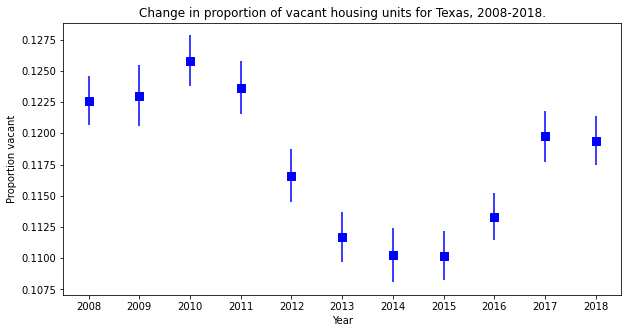

In [ ]:
import matplotlib.pyplot as plt
# Bar chart with eror
# Thanks google search "python plot add confidence interval to point estimate plot"
## https://python-graph-gallery.com/8-add-confidence-interval-on-barplot/
plt.figure(figsize=(10,5))
plt.errorbar(x    = state_acs_df['year'],
             y    = state_acs_df['B25002_003PE'],
             yerr = state_acs_df['B25002_003PM'],
             fmt='s',
             color='b',
             markersize=8)
plt.title('Change in proportion of vacant housing units for Texas, 2008-2018.')
plt.xlabel('Year')
plt.ylabel('Proportion vacant')
plt.show()